In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = r"NOT_REAL_DATA\\"
# Load images using OpenCV
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        image_list.append(img)

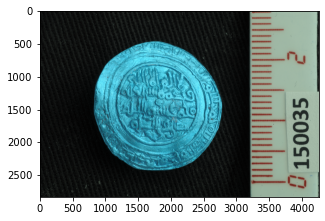

In [3]:
fig = plt.figure(figsize=(5, 6))
  
fig.add_subplot(1, 1, 1)
plt.imshow(image_list[0] )

## *First task*
 Isolate the coin from the image (remove the ruler and the note).

In [4]:
def crop_coin_simple(img, output_path):

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the color range for the coin
    lower_bound = np.array([20, 50, 50])  # Adjust these values based on the coin's color
    upper_bound = np.array([30, 255, 255])

    # Create a mask using the color range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour (assumed to be the coin)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Find extreme points (leftmost, rightmost, topmost, bottommost) of the contour
    leftmost = tuple(largest_contour[largest_contour[:,:,0].argmin()][0])
    rightmost = tuple(largest_contour[largest_contour[:,:,0].argmax()][0])
    topmost = tuple(largest_contour[largest_contour[:,:,1].argmin()][0])
    bottommost = tuple(largest_contour[largest_contour[:,:,1].argmax()][0])

    # Define the region of interest (ROI) using the coordinates of the bounding box
    roi = img[topmost[1]:bottommost[1], leftmost[0]:rightmost[0]]

    # Save the cropped region
    cv2.imwrite(output_path, roi)
            

#     # Create a mask for the largest contour
#     mask = np.zeros_like(mask)
#     cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

#     # Bitwise AND the original image with the mask
#     coin_roi = cv2.bitwise_and(img, img, mask=mask)

#     # Save the cropped coin image
#     cv2.imwrite(output_path, coin_roi)

In [5]:
def crop_images(output_dir , image_list):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Process each image in image_list
    for idx, img in enumerate(image_list):
        output_path = os.path.join(output_dir, f"cropped_image_{idx}.jpg")
        crop_coin_simple(img, output_path)
        print(f"Image {idx} cropped and saved to {output_path}")

In [6]:
crop_images("REAL_DATA_CROPPED1",image_list)

Image 0 cropped and saved to REAL_DATA_CROPPED1\cropped_image_0.jpg
Image 1 cropped and saved to REAL_DATA_CROPPED1\cropped_image_1.jpg
Image 2 cropped and saved to REAL_DATA_CROPPED1\cropped_image_2.jpg
Image 3 cropped and saved to REAL_DATA_CROPPED1\cropped_image_3.jpg
Image 4 cropped and saved to REAL_DATA_CROPPED1\cropped_image_4.jpg
Image 5 cropped and saved to REAL_DATA_CROPPED1\cropped_image_5.jpg
Image 6 cropped and saved to REAL_DATA_CROPPED1\cropped_image_6.jpg
Image 7 cropped and saved to REAL_DATA_CROPPED1\cropped_image_7.jpg
Image 8 cropped and saved to REAL_DATA_CROPPED1\cropped_image_8.jpg
Image 9 cropped and saved to REAL_DATA_CROPPED1\cropped_image_9.jpg
Image 10 cropped and saved to REAL_DATA_CROPPED1\cropped_image_10.jpg
Image 11 cropped and saved to REAL_DATA_CROPPED1\cropped_image_11.jpg
Image 12 cropped and saved to REAL_DATA_CROPPED1\cropped_image_12.jpg
Image 13 cropped and saved to REAL_DATA_CROPPED1\cropped_image_13.jpg
Image 14 cropped and saved to REAL_DATA_

Image 117 cropped and saved to REAL_DATA_CROPPED1\cropped_image_117.jpg
Image 118 cropped and saved to REAL_DATA_CROPPED1\cropped_image_118.jpg
Image 119 cropped and saved to REAL_DATA_CROPPED1\cropped_image_119.jpg
Image 120 cropped and saved to REAL_DATA_CROPPED1\cropped_image_120.jpg
Image 121 cropped and saved to REAL_DATA_CROPPED1\cropped_image_121.jpg
Image 122 cropped and saved to REAL_DATA_CROPPED1\cropped_image_122.jpg
Image 123 cropped and saved to REAL_DATA_CROPPED1\cropped_image_123.jpg
Image 124 cropped and saved to REAL_DATA_CROPPED1\cropped_image_124.jpg
Image 125 cropped and saved to REAL_DATA_CROPPED1\cropped_image_125.jpg
Image 126 cropped and saved to REAL_DATA_CROPPED1\cropped_image_126.jpg
Image 127 cropped and saved to REAL_DATA_CROPPED1\cropped_image_127.jpg
Image 128 cropped and saved to REAL_DATA_CROPPED1\cropped_image_128.jpg
Image 129 cropped and saved to REAL_DATA_CROPPED1\cropped_image_129.jpg
Image 130 cropped and saved to REAL_DATA_CROPPED1\cropped_image_

Image 231 cropped and saved to REAL_DATA_CROPPED1\cropped_image_231.jpg
Image 232 cropped and saved to REAL_DATA_CROPPED1\cropped_image_232.jpg
Image 233 cropped and saved to REAL_DATA_CROPPED1\cropped_image_233.jpg
Image 234 cropped and saved to REAL_DATA_CROPPED1\cropped_image_234.jpg
Image 235 cropped and saved to REAL_DATA_CROPPED1\cropped_image_235.jpg
Image 236 cropped and saved to REAL_DATA_CROPPED1\cropped_image_236.jpg
Image 237 cropped and saved to REAL_DATA_CROPPED1\cropped_image_237.jpg
Image 238 cropped and saved to REAL_DATA_CROPPED1\cropped_image_238.jpg
Image 239 cropped and saved to REAL_DATA_CROPPED1\cropped_image_239.jpg
Image 240 cropped and saved to REAL_DATA_CROPPED1\cropped_image_240.jpg
Image 241 cropped and saved to REAL_DATA_CROPPED1\cropped_image_241.jpg
Image 242 cropped and saved to REAL_DATA_CROPPED1\cropped_image_242.jpg
Image 243 cropped and saved to REAL_DATA_CROPPED1\cropped_image_243.jpg
Image 244 cropped and saved to REAL_DATA_CROPPED1\cropped_image_

Image 346 cropped and saved to REAL_DATA_CROPPED1\cropped_image_346.jpg
Image 347 cropped and saved to REAL_DATA_CROPPED1\cropped_image_347.jpg
Image 348 cropped and saved to REAL_DATA_CROPPED1\cropped_image_348.jpg
Image 349 cropped and saved to REAL_DATA_CROPPED1\cropped_image_349.jpg
Image 350 cropped and saved to REAL_DATA_CROPPED1\cropped_image_350.jpg
Image 351 cropped and saved to REAL_DATA_CROPPED1\cropped_image_351.jpg
Image 352 cropped and saved to REAL_DATA_CROPPED1\cropped_image_352.jpg
Image 353 cropped and saved to REAL_DATA_CROPPED1\cropped_image_353.jpg
Image 354 cropped and saved to REAL_DATA_CROPPED1\cropped_image_354.jpg
Image 355 cropped and saved to REAL_DATA_CROPPED1\cropped_image_355.jpg
Image 356 cropped and saved to REAL_DATA_CROPPED1\cropped_image_356.jpg
Image 357 cropped and saved to REAL_DATA_CROPPED1\cropped_image_357.jpg
Image 358 cropped and saved to REAL_DATA_CROPPED1\cropped_image_358.jpg
Image 359 cropped and saved to REAL_DATA_CROPPED1\cropped_image_

In [7]:
def add_padding(image, target_size):
    # Calculate padding dimensions
    h, w = image.shape[:2]
    target_h, target_w = target_size
    pad_h = max(0, target_h - h)
    pad_w = max(0, target_w - w)
    
    # Add padding to the image
    padded_image = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    
    return padded_image

# Load images using OpenCV
data_path = r"REAL_DATA_CROPPED1\\"
image_list = []
max_height = 0
max_width = 0

#crop fully
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        h, w = img.shape[:2]

# Determine maximum width and height
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        h, w = img.shape[:2]
        max_height = max(max_height, h)
        max_width = max(max_width, w)
        image_list.append(img)
       
# Add padding to each image
padded_image_list = []
for img in image_list:
    padded_img = add_padding(img, (max_height, max_width))
    padded_image_list.append(padded_img)

# Save padded images to a new directory
output_dir = "REAL_DATA_Padded1"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, padded_img in enumerate(padded_image_list):
    output_path = os.path.join(output_dir, f"padded_image_{i}.jpg")
    cv2.imwrite(output_path, padded_img)


KeyboardInterrupt: 

In [ ]:
# Check if all images have the same size
sizes = set()
for img in padded_image_list:
    sizes.add(img.shape[:2])

if len(sizes) == 1:
    print("All images have the same size.")
    print("Size:", sizes.pop())
else:
    print("Images have different sizes.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming the images are RGB (3 channels)
input_shape = (2000, 1000, 3)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Flatten the output of the conv layers to pass it to the dense layer
    Flatten(),
    
    # Add a dense layer to generate feature vectors. 
    # You can adjust the size of the output (e.g., 256) based on your needs
    Dense(256, activation='relu'),
])

# Display the model's architecture
model.summary()

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
import numpy as np

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

# Load and preprocess image
img = load_img('path_to_your_image.jpg', target_size=(224, 224))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Extract features
features = model.predict(img)

In [ ]:
from sklearn.cluster import KMeans

# Assuming 'features' is an array of feature vectors for your images
kmeans = KMeans(n_clusters=10, random_state=0).fit(features)
cluster_labels = kmeans.labels_